In [31]:
import pandas as pd

# 📌 파일 경로 설정
train_path = "C:/Hackerton/train.csv"

# 📌 데이터 로드
train_df = pd.read_csv(train_path, encoding="utf-8-sig")

# 📌 전체 행 개수 출력
num_rows = train_df.shape[0]
print(f"✅ 전체 행 개수: {num_rows}")

# 📌 각 열별 결측치 개수 계산
missing_values = train_df.isnull().sum()

# 📌 결측치 개수가 0보다 큰 열만 출력
missing_values = missing_values[missing_values > 0]

# 📌 결측치 개수 출력
if missing_values.empty:
    print("✅ 결측치가 없습니다!")
else:
    print("✅ 각 열별 결측치 개수:")
    print(missing_values)


✅ 전체 행 개수: 256351
✅ 각 열별 결측치 개수:
임신 시도 또는 마지막 임신 경과 연수    246981
특정 시술 유형                      2
단일 배아 이식 여부                6291
착상 전 유전 검사 사용 여부         253633
착상 전 유전 진단 사용 여부           6291
배아 생성 주요 이유                6291
총 생성 배아 수                  6291
미세주입된 난자 수                 6291
미세주입에서 생성된 배아 수            6291
이식된 배아 수                   6291
미세주입 배아 이식 수               6291
저장된 배아 수                   6291
미세주입 후 저장된 배아 수            6291
해동된 배아 수                   6291
해동 난자 수                    6291
수집된 신선 난자 수                6291
저장된 신선 난자 수                6291
혼합된 난자 수                   6291
파트너 정자와 혼합된 난자 수           6291
기증자 정자와 혼합된 난자 수           6291
동결 배아 사용 여부                6291
신선 배아 사용 여부                6291
기증 배아 사용 여부                6291
대리모 여부                     6291
PGD 시술 여부                254172
PGS 시술 여부                254422
난자 채취 경과일                 57488
난자 해동 경과일                254915
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
배아 해동 경

In [33]:
import pandas as pd
import statsmodels.api as sm

# 📌 파일 경로 설정
train_path = "C:/Hackerton/train_cleaned.csv"

# 📌 데이터 로드
train_df = pd.read_csv(train_path, encoding="utf-8-sig")

# 📌 종속 변수 (Target)
target_col = "임신 성공 여부"

# 📌 독립 변수 (변수 2개만 선택)
selected_features = ["PGD 시술 여부", "PGS 시술 여부"]

# 📌 결측값 제거
train_df = train_df[selected_features + [target_col]].dropna()

# 📌 로지스틱 회귀 모델 학습
X = train_df[selected_features]
y = train_df[target_col]

# 상수 추가 (로지스틱 회귀에서는 필요)
X = sm.add_constant(X)

# 모델 적합
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 결과 출력
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.571257
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               임신 성공 여부   No. Observations:               256351
Model:                          Logit   Df Residuals:                   256348
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 Feb 2025   Pseudo R-squ.:               0.0001149
Time:                        00:35:40   Log-Likelihood:            -1.4644e+05
converged:                       True   LL-Null:                   -1.4646e+05
Covariance Type:            nonrobust   LLR p-value:                 4.914e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1471      0.037    -31.092      0.000      -1.219      -1.075
PGD 시술 여부      0.0532      0.

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 📌 파일 경로 설정
train_path = "C:/Hackerton/train.csv"
test_path = "C:/Hackerton/test.csv"

# 📌 데이터 로드
train_df = pd.read_csv(train_path, encoding="utf-8")
test_df = pd.read_csv(test_path, encoding="utf-8")

# 📌 결측값을 -1로 변환할 컬럼 목록 (배아 및 난자 관련 추가 포함)
columns_to_replace = [
    "배란 자극 여부", "단일 배아 이식 여부", "착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인", 
    
    
    
    "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
    "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인",
    "불임 원인 - 난관 질환", "불임 원인 - 남성 요인", "불임 원인 - 배란 장애", "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증", "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태",
    "동결 배아 사용 여부", "신선 배아 사용 여부", "기증 배아 사용 여부", "대리모 여부",
    "PGD 시술 여부", "PGS 시술 여부",
    "총 생성 배아 수", "미세주입된 난자 수", "미세주입에서 생성된 배아 수",
    "이식된 배아 수", "미세주입 배아 이식 수", "저장된 배아 수",
    "미세주입 후 저장된 배아 수", "해동된 배아 수", "해동 난자 수",
    "수집된 신선 난자 수", "저장된 신선 난자 수", "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수", "기증자 정자와 혼합된 난자 수",
    "난자 채취 경과일", "난자 해동 경과일", "난자 혼합 경과일",
    "배아 이식 경과일", "배아 해동 경과일"
]

# 📌 Train/Test 데이터 동일한 결측값 처리
for df in [train_df, test_df]:
    df[columns_to_replace] = df[columns_to_replace].fillna(-1)
    df["임신 시도 또는 마지막 임신 경과 연수"] = df["임신 시도 또는 마지막 임신 경과 연수"].fillna(0).astype(int)
    df["시술 시기 코드"] = df["시술 시기 코드"].astype("category").cat.codes

# 📌 LabelEncoder를 사용한 동일한 인코딩 적용 함수
def apply_label_encoding(train_col, test_col):
    label_encoder = LabelEncoder()
    train_col = train_col.astype(str).fillna("NaN")
    test_col = test_col.astype(str).fillna("NaN")
    
    # Train에서 학습한 인코더를 Test에도 동일 적용
    label_encoder.fit(train_col)
    return label_encoder.transform(train_col), label_encoder.transform(test_col)

# 📌 레이블 인코딩 적용할 컬럼 리스트
label_encode_columns = [
    "시술 당시 나이", "배란 유도 유형", "시술 유형",
    "난자 출처", "정자 출처", "난자 기증자 나이", "정자 기증자 나이",
    "총 시술 횟수", "클리닉 내 총 시술 횟수", "IVF 시술 횟수", "DI 시술 횟수", "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수", "총 출산 횟수",
    "IVF 출산 횟수", "DI 출산 횟수"
]

for col in label_encode_columns:
    train_df[col], test_df[col] = apply_label_encoding(train_df[col], test_df[col])

# 📌 특정 시술 유형 (유효한 값 목록)
valid_treatments = {"IVF", "IUI", "FER", "IVI", "BLASTOCYST", "AH", "GIFT", "ICI", "Generic DI", "ICSI", "Unknown"}

# 📌 유효하지 않은 값(레이블 인코딩할 목록)
invalid_treatments = {
    "ICSI:ICSI", "ICSI / BLASTOCYST", "IVF / BLASTOCYST", "IVF:IVF", "ICSI:IVF",
    "ICSI / AH", "IVF:ICSI", "IVF / AH", "ICSI:Unknown", "IVF:Unknown",
    "ICSI / BLASTOCYST:IVF / BLASTOCYST", "ICSI / BLASTOCYST :IVF / BLASTOCYST",
    "IVF / AH:ICSI / AH", "ICSI / AH:Unknown", "ICSI / BLASTOCYST :ICSI"
}

# 📌 특정 시술 유형 처리 함수
def process_treatment_type(value):
    if pd.isna(value):
        return "Unknown"  # NaN 값은 "Unknown" 처리
    elif value in valid_treatments:
        return value  # 유효한 값 그대로 유지
    elif value in invalid_treatments:
        return value  # 레이블 인코딩할 값 그대로 유지
    else:
        return "Mixed"  # 예상치 못한 값은 Mixed로 처리

# 📌 Train/Test 동일한 방식 적용
train_df["특정 시술 유형"] = train_df["특정 시술 유형"].apply(process_treatment_type)
test_df["특정 시술 유형"] = test_df["특정 시술 유형"].apply(process_treatment_type)

# 📌 유효한 값은 원-핫 인코딩 수행
for treatment in valid_treatments:
    train_df[f"특정 시술 - {treatment}"] = (train_df["특정 시술 유형"] == treatment).astype(int)
    test_df[f"특정 시술 - {treatment}"] = (test_df["특정 시술 유형"] == treatment).astype(int)

# 📌 유효하지 않은 값만 레이블 인코딩 수행
label_encoder = LabelEncoder()

# 기본값 0으로 초기화
train_df["특정 시술 - Invalid"] = 0
test_df["특정 시술 - Invalid"] = 0

# 유효하지 않은 값이 있는 경우 레이블 인코딩 적용
train_invalid_values = train_df[train_df["특정 시술 유형"].isin(invalid_treatments)]["특정 시술 유형"]
test_invalid_values = test_df[test_df["특정 시술 유형"].isin(invalid_treatments)]["특정 시술 유형"]

if not train_invalid_values.empty:
    train_encoded = label_encoder.fit_transform(train_invalid_values) + 1  # 1부터 시작
    train_df.loc[train_df["특정 시술 유형"].isin(invalid_treatments), "특정 시술 - Invalid"] = train_encoded

if not test_invalid_values.empty:
    test_encoded = label_encoder.transform(test_invalid_values) + 1  # 1부터 시작
    test_df.loc[test_df["특정 시술 유형"].isin(invalid_treatments), "특정 시술 - Invalid"] = test_encoded

# 📌 Min-Max Scaling (정규화) 적용 (0~1 사이 값으로 변환)
scaler = MinMaxScaler()

# 정규화가 필요한 경우만 적용
if train_df["특정 시술 - Invalid"].max() > 0:
    train_df["특정 시술 - Invalid"] = scaler.fit_transform(train_df[["특정 시술 - Invalid"]])

if test_df["특정 시술 - Invalid"].max() > 0:
    test_df["특정 시술 - Invalid"] = scaler.transform(test_df[["특정 시술 - Invalid"]])

# 📌 원본 컬럼 삭제
train_df.drop(columns=["특정 시술 유형"], inplace=True)
test_df.drop(columns=["특정 시술 유형"], inplace=True)

# 📌 배아 생성 주요 이유 (One-Hot Encoding)
train_df["배아 생성 주요 이유"] = train_df["배아 생성 주요 이유"].fillna("알 수 없음")
test_df["배아 생성 주요 이유"] = test_df["배아 생성 주요 이유"].fillna("알 수 없음")

embryo_reasons = ["기증용", "난자 저장용", "배아 저장용", "연구용", "현재 시술용"]
for reason in embryo_reasons:
    train_df[f"배아 생성 - {reason}"] = train_df["배아 생성 주요 이유"].apply(lambda x: 1 if reason in str(x) else 0)
    test_df[f"배아 생성 - {reason}"] = test_df["배아 생성 주요 이유"].apply(lambda x: 1 if reason in str(x) else 0)

train_df.drop(columns=["배아 생성 주요 이유"], inplace=True)
test_df.drop(columns=["배아 생성 주요 이유"], inplace=True)

# 📌 숫자형 컬럼 중 빈 값 0으로 변환 (Train/Test 동일)
columns_to_encode = [
    "총 시술 횟수", "클리닉 내 총 시술 횟수", "IVF 시술 횟수", "DI 시술 횟수",
    "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수",
    "총 출산 횟수", "IVF 출산 횟수", "DI 출산 횟수"
]

for df in [train_df, test_df]:
    df[columns_to_encode] = df[columns_to_encode].fillna(0)

# 📌 최종 데이터 저장
train_output_path = "C:/Hackerton/train_cleaned2.csv"
test_output_path = "C:/Hackerton/test_cleaned2.csv"

train_df.to_csv(train_output_path, index=False, encoding="utf-8-sig")
test_df.to_csv(test_output_path, index=False, encoding="utf-8-sig")

print(f"✅ 데이터 전처리 완료!")
print(f"📁 Train 파일 저장 완료: {train_output_path}")
print(f"📁 Test 파일 저장 완료: {test_output_path}")

✅ 데이터 전처리 완료!
📁 Train 파일 저장 완료: C:/Hackerton/train_cleaned2.csv
📁 Test 파일 저장 완료: C:/Hackerton/test_cleaned2.csv


In [22]:
import pandas as pd

# 📌 파일 경로 설정
train_output_path = "C:/Hackerton/train_cleaned2.csv"
test_output_path = "C:/Hackerton/test_cleaned2.csv"

# 📌 데이터 로드
train_df = pd.read_csv(train_output_path, encoding="utf-8-sig")
test_df = pd.read_csv(test_output_path, encoding="utf-8-sig")

# 📌 유지할 컬럼 리스트
selected_columns = [
    "시술 시기 코드", "시술 당시 나이", "배란 자극 여부", "배란 유도 유형", "남성 주 불임 원인", "남성 부 불임 원인", 
    "여성 주 불임 원인", "여성 부 불임 원인", "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인", 
    "불임 원인 - 난관 질환", "불임 원인 - 남성 요인", "불임 원인 - 배란 장애", "불임 원인 - 여성 요인", 
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증", "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", 
    "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태", "총 시술 횟수", "클리닉 내 총 시술 횟수", "IVF 시술 횟수", 
    "DI 시술 횟수", "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수", "총 출산 횟수", "IVF 출산 횟수", "DI 출산 횟수", 
    "해동된 배아 수", "해동 난자 수", "수집된 신선 난자 수", "저장된 신선 난자 수", "혼합된 난자 수", 
    "난자 출처", "정자 출처", "동결 배아 사용 여부", "신선 배아 사용 여부"
]

# 📌 필요한 컬럼만 유지
train_df = train_df.loc[:, selected_columns + ["임신 성공 여부"]]
test_df = test_df.loc[:, selected_columns]

# 📌 새로운 파일로 저장
filtered_train_path = "C:/Hackerton/train_filtered.csv"
filtered_test_path = "C:/Hackerton/test_filtered.csv"

train_df.to_csv(filtered_train_path, index=False, encoding="utf-8-sig")
test_df.to_csv(filtered_test_path, index=False, encoding="utf-8-sig")

print("✅ 선택한 컬럼만 포함된 파일 저장 완료!")
print(f"📁 Train 파일 저장 완료: {filtered_train_path}")
print(f"📁 Test 파일 저장 완료: {filtered_test_path}")

✅ 선택한 컬럼만 포함된 파일 저장 완료!
📁 Train 파일 저장 완료: C:/Hackerton/train_filtered.csv
📁 Test 파일 저장 완료: C:/Hackerton/test_filtered.csv


In [17]:
# "배란 유도 유형" 컬럼의 결측치 개수 확인
missing_ovulation_induction = df["시술 유형"].isnull().sum()

# 결과 출력
if missing_ovulation_induction > 0:
    print(f"❌ '배란 유도 유형' 컬럼에 {missing_ovulation_induction}개의 결측치(NaN)가 존재합니다.")
else:
    print("✅ '배란 유도 유형' 컬럼에 결측치가 없습니다!")


✅ '배란 유도 유형' 컬럼에 결측치가 없습니다!


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 📌 데이터 파일 경로 설정
train_path = "C:/Hackerton/train_cleaned.csv"
test_path = "C:/Hackerton/test_cleaned.csv"
submission_path = "C:/Hackerton/sample_submission.csv"  # 예측 결과 저장 파일

# 📌 Train 데이터 로드
train_df = pd.read_csv(train_path, encoding="utf-8")
test_df = pd.read_csv(test_path, encoding="utf-8")

# 📌 종속 변수 (예측할 대상)
target_col = "임신 성공 여부"

# 📌 불필요한 ID 컬럼 제거 (Train)
if "ID" in train_df.columns:
    train_df.drop(columns=["ID"], inplace=True)

# 📌 불균형 데이터 처리 (1:1 언더샘플링)
df_majority = train_df[train_df[target_col] == 0]  # 다수 클래스 (0)
df_minority = train_df[train_df[target_col] == 1]  # 소수 클래스 (1)

# 1의 개수만큼 0에서 샘플링하여 균형 맞추기
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

# 0과 1을 합쳐서 새로운 균형 데이터셋 생성
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# 📌 다시 독립 변수(X)와 종속 변수(Y) 설정
X = df_balanced.drop(columns=[target_col])
y = df_balanced[target_col]

# 📌 훈련 데이터(train)와 테스트 데이터(validation) 분할 (80:20 비율)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 📌 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 📌 검증 데이터 평가 (Validation Set)
y_val_pred = rf_model.predict(X_val)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# 📊 성능 지표 계산
accuracy = accuracy_score(y_val, y_val_pred)  # 정확도 (Accuracy)
precision = precision_score(y_val, y_val_pred)  # 정밀도 (Precision)
recall = recall_score(y_val, y_val_pred)  # 민감도 (Sensitivity, Recall)
f1 = f1_score(y_val, y_val_pred)  # F1-score

# 📌 특이도(Specificity) 계산
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # 특이도 (Specificity)

# 📌 결과 출력
print("\n✅ 랜덤 포레스트 컨퓨전 매트릭스:")
print(pd.DataFrame(conf_matrix, 
                   index=["실제: 실패", "실제: 성공"], 
                   columns=["예측: 실패", "예측: 성공"]))

print("\n✅ 랜덤 포레스트 성능 평가 지표:")
print(f"정확도 (Accuracy): {accuracy:.4f}")
print(f"정밀도 (Precision): {precision:.4f}")
print(f"민감도 (Sensitivity, Recall): {recall:.4f}")
print(f"특이도 (Specificity): {specificity:.4f}")
print(f"F1-score: {f1:.4f}")

# 📌 Test 데이터 예측 수행 (ID 컬럼 유지)
if "ID" in test_df.columns:
    test_ids = test_df["ID"]  # ID 컬럼 따로 저장
    X_test = test_df.drop(columns=["ID"])  # ID 제외한 입력 데이터
else:
    test_ids = None
    X_test = test_df.copy()

y_test_pred = rf_model.predict(X_test)

# 📌 예측 결과를 DataFrame으로 변환
submission_df = pd.DataFrame({
    "ID": test_ids,
    "probability": y_test_pred
})

# 📌 예측 결과 저장
submission_df.to_csv(submission_path, index=False, encoding="utf-8-sig")

print(f"\n✅ 예측 완료! 결과 저장: {submission_path}")



✅ 랜덤 포레스트 컨퓨전 매트릭스:
        예측: 실패  예측: 성공
실제: 실패    7825    5421
실제: 성공    3955    9291

✅ 랜덤 포레스트 성능 평가 지표:
정확도 (Accuracy): 0.6461
정밀도 (Precision): 0.6315
민감도 (Sensitivity, Recall): 0.7014
특이도 (Specificity): 0.5907
F1-score: 0.6646

✅ 예측 완료! 결과 저장: C:/Hackerton/sample_submission.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 📌 데이터 파일 경로 설정
train_path = "C:/Hackerton/train_fifi.csv"

# 📌 Train 데이터 로드
train_df = pd.read_csv(train_path, encoding="utf-8")

# 📌 종속 변수 (예측할 대상)
target_col = "임신 성공 여부"

# 📌 불필요한 ID 컬럼 제거 (Train)
if "ID" in train_df.columns:
    train_df.drop(columns=["ID"], inplace=True)

# 📌 불균형 데이터 처리 (1:1 언더샘플링)
df_majority = train_df[train_df[target_col] == 0]  # 다수 클래스 (0)
df_minority = train_df[train_df[target_col] == 1]  # 소수 클래스 (1)

# 1의 개수만큼 0에서 샘플링하여 균형 맞추기
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

# 0과 1을 합쳐서 새로운 균형 데이터셋 생성
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# 📌 다시 독립 변수(X)와 종속 변수(Y) 설정
X = df_balanced.drop(columns=[target_col])
y = df_balanced[target_col]

# 📌 훈련 데이터(train)와 테스트 데이터(validation) 분할 (80:20 비율)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 📌 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 📌 검증 데이터 평가 (Validation Set)
y_val_pred = rf_model.predict(X_val)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# 📊 성능 지표 계산
accuracy = accuracy_score(y_val, y_val_pred)  # 정확도 (Accuracy)
precision = precision_score(y_val, y_val_pred)  # 정밀도 (Precision)
recall = recall_score(y_val, y_val_pred)  # 민감도 (Sensitivity, Recall)
f1 = f1_score(y_val, y_val_pred)  # F1-score

# 📌 특이도(Specificity) 계산
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # 특이도 (Specificity)

# 📌 결과 출력
print("\n✅ 랜덤 포레스트 컨퓨전 매트릭스:")
print(pd.DataFrame(conf_matrix, 
                   index=["실제: 실패", "실제: 성공"], 
                   columns=["예측: 실패", "예측: 성공"]))

print("\n✅ 랜덤 포레스트 성능 평가 지표:")
print(f"정확도 (Accuracy): {accuracy:.4f}")
print(f"정밀도 (Precision): {precision:.4f}")
print(f"민감도 (Sensitivity, Recall): {recall:.4f}")
print(f"특이도 (Specificity): {specificity:.4f}")
print(f"F1-score: {f1:.4f}")


✅ 랜덤 포레스트 컨퓨전 매트릭스:
        예측: 실패  예측: 성공
실제: 실패    7827    5419
실제: 성공    3775    9471

✅ 랜덤 포레스트 성능 평가 지표:
정확도 (Accuracy): 0.6530
정밀도 (Precision): 0.6361
민감도 (Sensitivity, Recall): 0.7150
특이도 (Specificity): 0.5909
F1-score: 0.6732


In [53]:
import pandas as pd

# 📌 Train 데이터 로드
train_path = "C:/Hackerton/train.csv"
train_df = pd.read_csv(train_path, encoding="utf-8")

# 📌 특정 시술 유형 리스트 (유효한 값)
valid_treatments = {"IVF", "IUI", "FER", "IVI", "BLASTOCYST", "AH", "GIFT", "ICI", "Generic DI", "ICSI", "Unknown"}

# 📌 "특정 시술 유형" 컬럼에서 유효하지 않은 값 확인
if "특정 시술 유형" in train_df.columns:
    # 유효한 값에 포함되지 않은 값만 필터링
    invalid_values = train_df[~train_df["특정 시술 유형"].isin(valid_treatments)]["특정 시술 유형"]
    invalid_count = invalid_values.count()

    # 📌 결과 출력
    print(f"\n✅ 특정 시술 유형에서 유효하지 않은 값 개수: {invalid_count}개")
    
    # 잘못된 값이 있을 경우, 전체 값 출력
    if invalid_count > 0:
        print("\n🔴 유효하지 않은 값 전체 목록:")
        print(invalid_values.value_counts())
else:
    print("⚠️ '특정 시술 유형' 컬럼이 존재하지 않습니다.")



✅ 특정 시술 유형에서 유효하지 않은 값 개수: 8992개

🔴 유효하지 않은 값 전체 목록:
특정 시술 유형
ICSI:ICSI                              2314
ICSI / BLASTOCYST                      1609
IVF / BLASTOCYST                       1248
IVF:IVF                                1146
ICSI:IVF                                873
ICSI / AH                               769
IVF:ICSI                                392
IVF / AH                                319
ICSI:Unknown                            207
IVF:Unknown                             100
ICSI / BLASTOCYST:IVF / BLASTOCYST        6
ICSI / BLASTOCYST :IVF / BLASTOCYST       4
IVF / AH:ICSI / AH                        2
ICSI / AH:Unknown                         2
ICSI / BLASTOCYST :ICSI                   1
Name: count, dtype: int64


✅ 데이터 균형 조정 후 클래스 분포:
임신 성공 여부
0    190123
1    190123
Name: count, dtype: int64

✅ 최적의 하이퍼파라미터: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.8}

✅ XGBoost 모델 정확도: 0.6840

✅ 분류 보고서:
              precision    recall  f1-score   support

           0       0.72      0.60      0.65     38025
           1       0.66      0.77      0.71     38025

    accuracy                           0.68     76050
   macro avg       0.69      0.68      0.68     76050
weighted avg       0.69      0.68      0.68     76050



C:\Users\pung\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\pung\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\pung\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\pung\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\pung\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pung\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) 

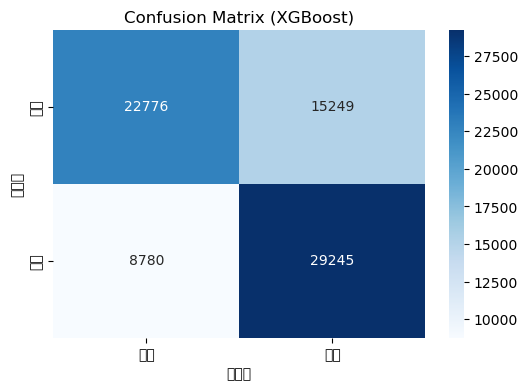

C:\Users\pung\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pung\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pung\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pung\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pung\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

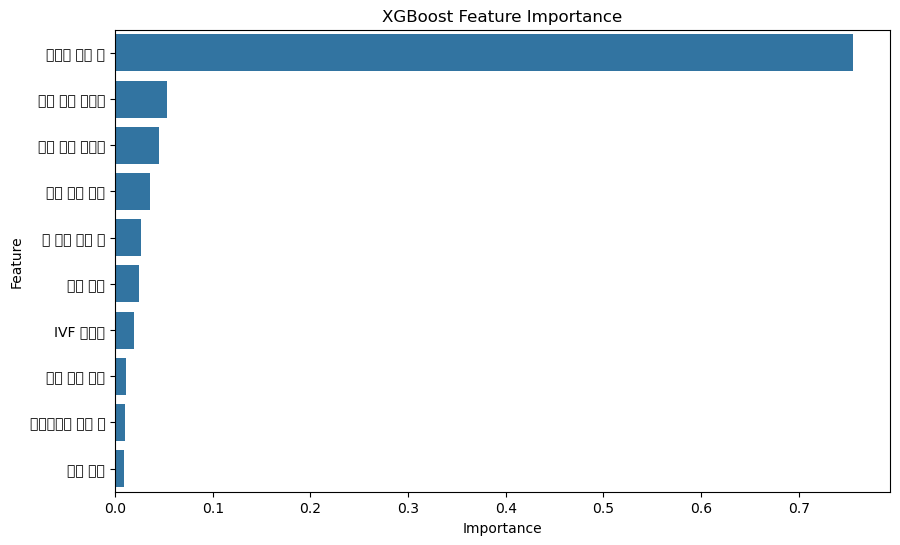


✅ 예측 완료! 결과 저장: C:/Hackerton/sample_submission.csv


In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# 📌 데이터 파일 경로 설정
train_path = "C:/Hackerton/train_cleaned.csv"
test_path = "C:/Hackerton/test_cleaned.csv"
submission_path = "C:/Hackerton/sample_submission.csv"

# 📌 데이터 로드 (ID 컬럼 유지)
train_df = pd.read_csv(train_path, encoding="utf-8-sig")
test_df = pd.read_csv(test_path, encoding="utf-8-sig")

# 📌 ID 컬럼 따로 저장 (Test 데이터)
test_ids = test_df.iloc[:, 0]  # 첫 번째 열을 ID로 저장
test_df = test_df.iloc[:, 1:]  # ID 제외한 나머지 데이터 사용

# 📌 종속 변수 설정 (임신 성공 여부)
target_col = "임신 성공 여부"

# 📌 Feature Selection (논문 기반 주요 변수 선택)
selected_features = [
    "시술 당시 나이", "총 생성 배아 수", "미세주입된 난자 수",
    "이식된 배아 수", "미세주입 배아 이식 수", "배란 자극 여부",
    "난자 채취 경과일", "배아 이식 경과일", "정자 출처"
]

# 📌 Feature Engineering (새로운 변수 생성)
train_df["IVF 성공률"] = train_df["이식된 배아 수"] / (train_df["총 생성 배아 수"] + 1)
test_df["IVF 성공률"] = test_df["이식된 배아 수"] / (test_df["총 생성 배아 수"] + 1)

# 🔹 **무한대 (inf) 값 또는 NaN이 발생할 가능성이 있는지 체크**
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# 🔹 **NaN 값이 있다면 0으로 대체**
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

# 📌 나이 그룹 생성 (-1, 0, 1로 변환)
train_df["나이 그룹"] = train_df["시술 당시 나이"].apply(lambda x: -1 if x == -1 else (0 if x == 0 else 1))
test_df["나이 그룹"] = test_df["시술 당시 나이"].apply(lambda x: -1 if x == -1 else (0 if x == 0 else 1))

# 선택된 변수 리스트에 추가
selected_features.append("나이 그룹")
selected_features.append("IVF 성공률")

# 📌 독립 변수(X)와 종속 변수(y) 분리
X = train_df[selected_features]
y = train_df[target_col]

# 📌 데이터 불균형 해결 (논문 방식 - SMOTE 적용)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"✅ 데이터 균형 조정 후 클래스 분포:\n{y_resampled.value_counts()}")

# 📌 Train/Test 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 📌 XGBoost 모델 학습
xgb = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42)
xgb.fit(X_train, y_train)

# 📌 하이퍼파라미터 튜닝 (GridSearchCV 적용)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 모델 선정
best_xgb = grid_search.best_estimator_
print(f"\n✅ 최적의 하이퍼파라미터: {grid_search.best_params_}")

# 📌 검증 데이터 평가
y_val_pred = best_xgb.predict(X_val)

# 📌 컨퓨전 매트릭스 생성 및 성능 평가
conf_matrix = confusion_matrix(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred)

# 📌 결과 출력
print(f"\n✅ XGBoost 모델 정확도: {accuracy:.4f}")
print("\n✅ 분류 보고서:")
print(report)

# 📌 컨퓨전 매트릭스 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["실패", "성공"], yticklabels=["실패", "성공"])
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("Confusion Matrix (XGBoost)")
plt.show()

# 📌 Feature Importance 시각화
feature_importance = best_xgb.feature_importances_
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df[:10])  # 상위 10개만 표시
plt.title("XGBoost Feature Importance")
plt.show()

# 📌 Test 데이터 예측
X_test = test_df[selected_features]
y_test_pred = best_xgb.predict(X_test)

# 📌 예측 결과를 DataFrame으로 변환
submission_df = pd.DataFrame({"ID": test_ids, "임신 성공 여부": y_test_pred})

# 📌 예측 결과 저장
submission_df.to_csv(submission_path, index=False, encoding="utf-8-sig")

print(f"\n✅ 예측 완료! 결과 저장: {submission_path}")

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

# 📌 파일 경로 설정
train_path = "C:/Hackerton/train_filtered.csv"
test_path = "C:/Hackerton/test_filtered.csv"
submission_path = "C:/Hackerton/sample_submission4.csv"

# 📌 데이터 로드
train_df = pd.read_csv(train_path, encoding="utf-8-sig")
test_df = pd.read_csv(test_path, encoding="utf-8-sig")

# 📌 종속 변수 설정 (임신 성공 여부)
target_col = "임신 성공 여부"

# 📌 독립 변수(X)와 종속 변수(y) 분리
X = train_df.drop(columns=[target_col])
y = train_df[target_col]

# 📌 사용될 feature 목록 저장
selected_features = X.columns.tolist()

# 📌 언더샘플링 적용
negative_samples = train_df[train_df[target_col] == 0]
positive_samples = train_df[train_df[target_col] == 1]
negative_samples_downsampled = negative_samples.sample(n=len(positive_samples), random_state=42)
train_balanced = pd.concat([negative_samples_downsampled, positive_samples])

# 📌 Train/Validation 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_balanced[selected_features],
    train_balanced[target_col],
    test_size=0.34,
    random_state=42,
    stratify=train_balanced[target_col]
)

print(f"✅ 언더샘플링 후 데이터 크기: {train_balanced.shape}")
print(f"✅ Train 크기: {X_train.shape}, Validation 크기: {X_val.shape}")

# 📌 XGBoost 기본 모델 학습
xgb = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42)
xgb.fit(X_train, y_train)

# 📌 개별 모델 정의
rf = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
logreg = LogisticRegression(max_iter=500)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lda = LinearDiscriminantAnalysis()

# 📌 소프트/하드 투표 분류기 정의
voting_hard = VotingClassifier(
    estimators=[("rf", rf), ("ada", ada), ("logreg", logreg), ("dt", dt), ("knn", knn), ("lda", lda)],
    voting="hard"
)

voting_soft = VotingClassifier(
    estimators=[("rf", rf), ("ada", ada), ("logreg", logreg), ("dt", dt), ("knn", knn), ("lda", lda)],
    voting="soft"
)

# 📌 모델 학습
voting_hard.fit(X_train, y_train)
voting_soft.fit(X_train, y_train)

# 📌 검증 데이터 평가
accuracy_hard = accuracy_score(y_val, voting_hard.predict(X_val))
accuracy_soft = accuracy_score(y_val, voting_soft.predict(X_val))

print(f"\n✅ 하드 투표 정확도: {accuracy_hard:.4f}")
print(f"\n✅ 소프트 투표 정확도: {accuracy_soft:.4f}")

# 📌 Test 데이터 예측
X_test = test_df[selected_features].replace([np.inf, -np.inf], np.nan).fillna(0)
y_test_pred_hard = voting_hard.predict(X_test)

# 📌 예측 결과 저장
submission_df = pd.DataFrame({"임신 성공 여부": y_test_pred_hard})
submission_df.to_csv(submission_path, index=False, encoding="utf-8-sig")

print(f"\n✅ 예측 완료! 결과 저장: {submission_path}")


✅ 언더샘플링 후 데이터 크기: (132456, 41)
✅ Train 크기: (87420, 40), Validation 크기: (45036, 40)


C:\Users\pung\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\pung\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\pung\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\pung\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context


✅ 하드 투표 정확도: 0.6130

✅ 소프트 투표 정확도: 0.6098

✅ 예측 완료! 결과 저장: C:/Hackerton/sample_submission4.csv
